In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import cmath
import matplotlib.image as mpimg 
import scipy.signal as signal

In [4]:
class inner_prod_2d():
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.N = np.shape(x)[0]
        
    def solve(self):
        product = 0 
        for i in range(self.N):
            for j in range(self.N):
                product = product + self.x[i, j] + np.cong(self.y[i, j])
                
        return product

In [5]:
class discrete_exp():
    def __init__(self, k, l, N):
        self.k = k
        self.l = l
        self.N = N
        
    def solve(self):
        e_kl = np.zeros([self.N, self.N], dtype = np.complex)
        for i in range(self.N):
            for j in range(self.N):
                e_kl[i, j] = 1/np.sqrt(self.N*self.N)*np.exp(-1j*2*cmath.pi*(self.k*i/self.N*self.l*j/self.N))
        return e_kl, np.real(e_kl), np.imag(e_kl)

In [8]:
class unit_energy_sqp_2D():
    def __init__(self, N, L):
        self.N = N
        self.L = L
        self.samples=N*N
        
    def solve(self):
        sq_pulse=np.zeros([self.N, self.N], dtype=np.float)
        for i in range(self.L):
            for j in range(self.L):
                sq_pulse[i,j] = 1/self.L/self.L
            
        return sq_pulse, self.samples
        

/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_5723/4011593061.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sq_pulse=np.zeros([self.N, self.N], dtype=np.float)


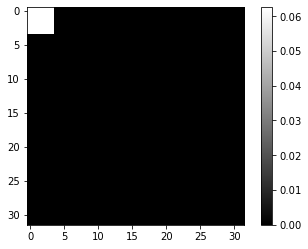

In [17]:
pulse, samples = unit_energy_sqp_2D(32, 4).solve()

plt.imshow(pulse, cmap='gray')
plt.colorbar()
plt.show()   

In [48]:
class gaussian():
    def __init__(self, N, mu, sigma):
        self.N = N
        self.mu = mu
        self.sigma = sigma
        self.samples = N*N 
        '''
   def solve(self):
        gaussian=np.zeros([self.N, self.N], dtype=np.float)
        for i in range(self.N):
            for j in range(self.N):
                gaussian[i,j] = np.exp(-((i-self.mu)*(i-self.mu)+(j-self.mu)*(j-self.mu))/2/self.sigma/self.sigma)
        return gaussian, self.samples
   ''' 
    def solve(self):
        gaussian_pulse = np.zeros([self.N, self.N], dtype = np.float)
        for i in range(self.N):
            for j in range(self.N):
                gaussian_pulse[i, j] = np.exp(-((i-self.mu)*(i-self.mu)+(j-self.mu)*(j-self.mu))/2/self.sigma/self.sigma)
        return gaussian_pulse, self.samples


/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_5723/2121753698.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  gaussian_pulse = np.zeros([self.N, self.N], dtype = np.float)


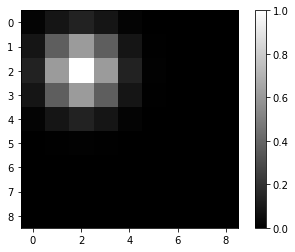

In [49]:
g_pulse, samples = gaussian(9, 2, 1).solve()
plt.imshow(g_pulse, cmap='gray')
plt.colorbar()
plt.show()   

/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_5723/2487356534.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  gaussian=np.zeros([self.N, self.N], dtype=np.float)


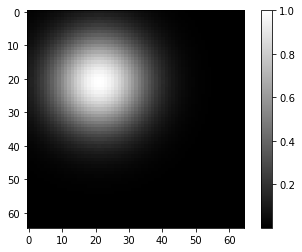

In [41]:
g_pulse, samples = gaussian(65, 21, 10).solve()
plt.imshow(g_pulse, cmap='gray')
plt.colorbar()
plt.show()   

/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_5723/2487356534.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  gaussian=np.zeros([self.N, self.N], dtype=np.float)


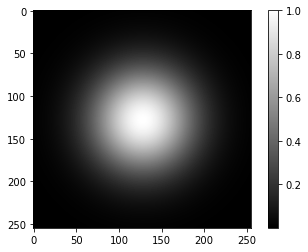

In [42]:
g_pulse, samples = gaussian(255, 128, 42).solve()
plt.imshow(g_pulse, cmap='gray')
plt.colorbar()
plt.show()   

In [50]:
class dft_2d():
    def __init__(self, x):
        self.x=x
        self.M=np.shape(x)[0]
        self.N=np.shape(x)[1]

    def first(self):
        X=np.zeros([self.M, self.N], dtype=np.complex)
        for m in range(self.M):
            for n in range(self.N):
                for i in range(self.M):
                    for j in range(self.N):
                        X[m,n] = X[m,n] + self.x[i,j]/np.sqrt(self.M*self.N)*np.exp(-1j*2*cmath.pi*(m*i/self.M+n*j/self.N))
        return X


/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_5723/2121753698.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  gaussian_pulse = np.zeros([self.N, self.N], dtype = np.float)
/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_5723/4208732561.py:8: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X=np.zeros([se

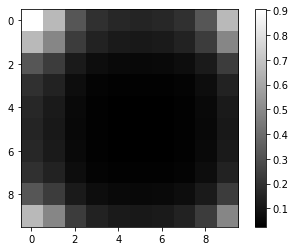

In [53]:
g_pulse, samples = gaussian(10, 0, 2).solve()
g_DFT = dft_2d(g_pulse).first()
plt.imshow(abs(g_DFT), cmap='gray')
plt.colorbar() 
plt.show()

In [58]:
class idft_2D():
   
    def __init__(self, X):
       
        self.X=X
        self.M=np.shape(X)[0]
        self.N=np.shape(X)[1]

    def solve(self):
        x=np.zeros([self.M, self.N], dtype=np.complex)
        for m in range(self.M):
            for n in range(self.N):
                for i in range(self.M):
                    for j in range(self.N):
                        x[m,n] = x[m,n] + self.X[i,j]/np.sqrt(self.M*self.N)*np.exp(1j*2*cmath.pi*(m*i/self.M+n*j/self.N))
        return x
    
  

/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_5723/2121753698.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  gaussian_pulse = np.zeros([self.N, self.N], dtype = np.float)
/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_5723/4208732561.py:8: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X=np.zeros([se

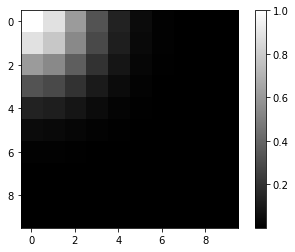

In [60]:
g_pulse, samples = gaussian(10, 0, 2).solve()
g_DFT = dft_2d(g_pulse).first()
g_iDFT = idft_2D(g_DFT).solve()
plt.imshow(abs(g_iDFT), cmap='gray')
plt.colorbar() 
plt.show()

In [73]:
class Convolution_2D():
    def __init__(self, x, y):
        self.x=x
        self.y=y

    def solve(self):
        
        filtered_signal = signal.convolve2d(self.x, self.y, boundary='symm', mode='same')
            
        return filtered_signal

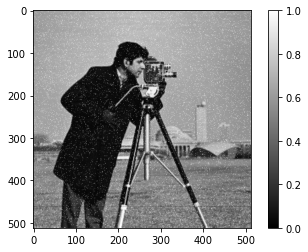

In [61]:
img = mpimg.imread('img1.png') 

plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()   

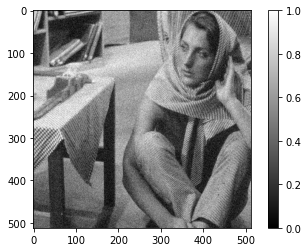

In [62]:
img = mpimg.imread('img2.png') 

plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()   


/var/folders/gj/ldtwgg_n0dngq84rgd6dmrdc0000gn/T/ipykernel_5723/2121753698.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  gaussian_pulse = np.zeros([self.N, self.N], dtype = np.float)


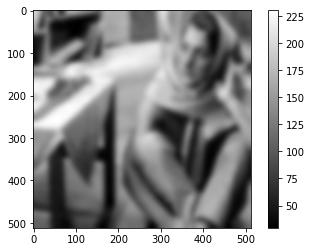

In [80]:
img = mpimg.imread('img2.png')     
def convolution(N):
    N = N
    mu = (N-1)/2
    sigma = (N-1)/6
    
    signal_2D = gaussian(N, mu, sigma)
    gaussian_signal, samples = signal_2D.solve() 
    
    gaussian_con = Convolution_2D(img, gaussian_signal)
    filtered_img = gaussian_con.solve()

    plt.imshow(filtered_img, cmap='gray')
    plt.colorbar()
    plt.show()    
    
convolution(40)